In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cremad/AudioWAV/1028_TSI_DIS_XX.wav
/kaggle/input/cremad/AudioWAV/1075_IEO_HAP_LO.wav
/kaggle/input/cremad/AudioWAV/1084_ITS_HAP_XX.wav
/kaggle/input/cremad/AudioWAV/1067_IWW_DIS_XX.wav
/kaggle/input/cremad/AudioWAV/1066_TIE_DIS_XX.wav
/kaggle/input/cremad/AudioWAV/1027_DFA_DIS_XX.wav
/kaggle/input/cremad/AudioWAV/1032_IEO_HAP_HI.wav
/kaggle/input/cremad/AudioWAV/1023_TIE_SAD_XX.wav
/kaggle/input/cremad/AudioWAV/1041_TAI_DIS_XX.wav
/kaggle/input/cremad/AudioWAV/1004_WSI_SAD_XX.wav
/kaggle/input/cremad/AudioWAV/1030_DFA_HAP_XX.wav
/kaggle/input/cremad/AudioWAV/1037_WSI_NEU_XX.wav
/kaggle/input/cremad/AudioWAV/1006_IOM_FEA_XX.wav
/kaggle/input/cremad/AudioWAV/1053_IEO_HAP_LO.wav
/kaggle/input/cremad/AudioWAV/1076_IEO_FEA_HI.wav
/kaggle/input/cremad/AudioWAV/1055_TSI_SAD_XX.wav
/kaggle/input/cremad/AudioWAV/1019_TIE_DIS_XX.wav
/kaggle/input/cremad/AudioWAV/1014_TAI_ANG_XX.wav
/kaggle/input/cremad/AudioWAV/1087_TIE_DIS_XX.wav
/kaggle/input/cremad/AudioWAV/1009_IWW_DIS_XX.wav


In [2]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

print(" Basic libraries imported successfully!")

 Basic libraries imported successfully!


In [3]:
import librosa
import librosa. display
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

print(" Audio processing libraries imported successfully!")

 Audio processing libraries imported successfully!


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn. metrics import classification_report, confusion_matrix, accuracy_score

print(" Machine Learning libraries imported successfully!")

 Machine Learning libraries imported successfully!


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras. callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

print(f"TensorFlow version: {tf.__version__}")
print(f"GPU Available: {len(tf.config.list_physical_devices('GPU')) > 0}")

2025-12-06 15:49:22.570948: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765036162.806362      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765036162.871744      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

TensorFlow version: 2.18.0
GPU Available: True


In [6]:
DATA_PATH = '/kaggle/input/cremad/AudioWAV'

MAX_PAD_LEN = 174
N_MFCC = 40
SAMPLE_RATE = None  
DURATION = 2.5
EPOCHS = 100
BATCH_SIZE = 32

EMOTION_MAP = {
    'ANG': 'Angry',
    'DIS': 'Disgust',
    'FEA': 'Fear',
    'HAP': 'Happy',
    'NEU': 'Neutral',
    'SAD': 'Sad'
}

print("=" * 70)
print("CONFIGURATION FOR CREMA-D DATASET")
print("=" * 70)
print(f"Data Path: {DATA_PATH}")
print(f"Audio Duration: {DURATION} seconds")
print(f"MFCC Coefficients: {N_MFCC}")
print(f"Max Pad Length: {MAX_PAD_LEN}")
print(f"Batch Size: {BATCH_SIZE}")
print(f"Training Epochs: {EPOCHS}")
print(f"\nEmotions: {list(EMOTION_MAP. values())}")
print("=" * 70)

CONFIGURATION FOR CREMA-D DATASET
Data Path: /kaggle/input/cremad/AudioWAV
Audio Duration: 2.5 seconds
MFCC Coefficients: 40
Max Pad Length: 174
Batch Size: 32
Training Epochs: 100

Emotions: ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad']


In [7]:
audio_files = [f for f in os.listdir(DATA_PATH) if f. endswith('.wav')]

print("=" * 70)
print("DATA VERIFICATION")
print("=" * 70)
print(f"✓ Total audio files found: {len(audio_files)}")

print(f"\nSample filenames:")
for i in range(min(5, len(audio_files))):
    print(f"  {i+1}. {audio_files[i]}")

sample = audio_files[0]
parts = sample.replace('.wav', '').split('_')
print(f"\nFilename format analysis:")
print(f"  Example: {sample}")
print(f"  Parts: {parts}")
print(f"    [0] Actor ID: {parts[0]}")
print(f"    [1] Sentence ID: {parts[1]}")
print(f"    [2] Emotion Code: {parts[2]}")
print(f"    [3] Intensity: {parts[3]}")
print("=" * 70)

DATA VERIFICATION
✓ Total audio files found: 7442

Sample filenames:
  1. 1028_TSI_DIS_XX.wav
  2. 1075_IEO_HAP_LO.wav
  3. 1084_ITS_HAP_XX.wav
  4. 1067_IWW_DIS_XX.wav
  5. 1066_TIE_DIS_XX.wav

Filename format analysis:
  Example: 1028_TSI_DIS_XX.wav
  Parts: ['1028', 'TSI', 'DIS', 'XX']
    [0] Actor ID: 1028
    [1] Sentence ID: TSI
    [2] Emotion Code: DIS
    [3] Intensity: XX


In [8]:
def extract_features(file_path, max_pad_len=174, n_mfcc=40):
    """
    استخراج MFCC features من ملف صوتي
    
    Parameters:
    -----------
    file_path : str
        مسار الملف الصوتي
    max_pad_len : int
        الطول الأقصى للـ padding
    n_mfcc : int
        عدد معاملات MFCC
    
    Returns:
    --------
    numpy.ndarray
        MFCC features بحجم (n_mfcc, max_pad_len)
    """
    try:
        audio, sample_rate = librosa.load(file_path, sr=None, duration=DURATION)
        
        if len(audio) == 0:
            return None
        
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
        
        pad_width = max_pad_len - mfccs.shape[1]
        if pad_width > 0:
            mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mfccs = mfccs[:, :max_pad_len]
        
        return mfccs
    
    except Exception as e:
        return None

print(" Feature extraction function created successfully!")

 Feature extraction function created successfully!


In [9]:
def load_cremad_data(data_path):
    """
    تحميل وتحضير بيانات CREMA-D
    
    Parameters:
    -----------
    data_path : str
        مسار مجلد AudioWAV
    
    Returns:
    --------
    features : numpy.ndarray
        مصفوفة الـ MFCC features
    labels : numpy.ndarray
        مصفوفة الـ labels (emotions)
    """
    features = []
    labels = []
    
    print("\n" + "=" * 70)
    print("LOADING CREMA-D DATASET")
    print("=" * 70)
    
    audio_files = [f for f in os.listdir(data_path) if f.endswith('.wav')]
    
    print(f"Total files to process: {len(audio_files)}\n")
    
    if len(audio_files) == 0:
        print("❌ ERROR: No audio files found!")
        return np.array([]), np.array([])
    
    skipped = 0
    emotion_counts = {emotion: 0 for emotion in EMOTION_MAP.keys()}
    
    for filename in tqdm(audio_files, desc="Processing audio files", unit="file"):
        try:
           
            parts = filename.replace('.wav', '').split('_')
            
            if len(parts) >= 3:
                emotion_code = parts[2]  # ANG, DIS, FEA, HAP, NEU, SAD
                
                if emotion_code in EMOTION_MAP:
                    file_path = os.path.join(data_path, filename)
                    
                    mfcc = extract_features(file_path, max_pad_len=MAX_PAD_LEN, n_mfcc=N_MFCC)
                    
                    if mfcc is not None:
                        features.append(mfcc)
                        labels.append(EMOTION_MAP[emotion_code])
                        emotion_counts[emotion_code] += 1
                    else:
                        skipped += 1
                else:
                    skipped += 1
            else:
                skipped += 1
                
        except Exception as e:
            skipped += 1
    
    print("\n" + "=" * 70)
    print("LOADING SUMMARY")
    print("=" * 70)
    print(f"✓ Successfully loaded: {len(features)} samples")
    print(f"⚠ Skipped: {skipped} files")
    
    print("\n" + "-" * 70)
    print("EMOTION DISTRIBUTION")
    print("-" * 70)
    
    for emotion_code, count in sorted(emotion_counts.items(), key=lambda x: x[1], reverse=True):
        emotion_name = EMOTION_MAP[emotion_code]
        percentage = (count / len(features) * 100) if len(features) > 0 else 0
        bar = '█' * int(percentage / 2)
        print(f"{emotion_name:10s} ({emotion_code}): {count:4d} | {percentage:5.2f}% {bar}")
    
    print("=" * 70)
    
    return np.array(features), np.array(labels)

print("Data loading function created successfully!")

Data loading function created successfully!


In [10]:
X, y = load_cremad_data(DATA_PATH)

if len(X) == 0:
    print("\n ERROR: No data was loaded!")
else:
    print("\n" + "=" * 70)
    print(" DATA LOADED SUCCESSFULLY")
    print("=" * 70)
    print(f"Features shape: {X.shape}")
    print(f"  - Number of samples: {X.shape[0]}")
    print(f"  - MFCC coefficients: {X.shape[1]}")
    print(f"  - Time frames: {X.shape[2]}")
    print(f"\nLabels shape: {y. shape}")
    print(f"  - Total labels: {len(y)}")
    print("=" * 70)


LOADING CREMA-D DATASET
Total files to process: 7442



Processing audio files: 100%|██████████| 7442/7442 [02:17<00:00, 54.29file/s]


LOADING SUMMARY
✓ Successfully loaded: 7442 samples
⚠ Skipped: 0 files

----------------------------------------------------------------------
EMOTION DISTRIBUTION
----------------------------------------------------------------------
Angry      (ANG): 1271 | 17.08% ████████
Disgust    (DIS): 1271 | 17.08% ████████
Fear       (FEA): 1271 | 17.08% ████████
Happy      (HAP): 1271 | 17.08% ████████
Sad        (SAD): 1271 | 17.08% ████████
Neutral    (NEU): 1087 | 14.61% ███████

 DATA LOADED SUCCESSFULLY
Features shape: (7442, 40, 174)
  - Number of samples: 7442
  - MFCC coefficients: 40
  - Time frames: 174

Labels shape: (7442,)
  - Total labels: 7442



CLASS DISTRIBUTION ANALYSIS
Emotion  Count  Percentage
  Angry   1271   17.078742
Disgust   1271   17.078742
   Fear   1271   17.078742
  Happy   1271   17.078742
    Sad   1271   17.078742
Neutral   1087   14.606289


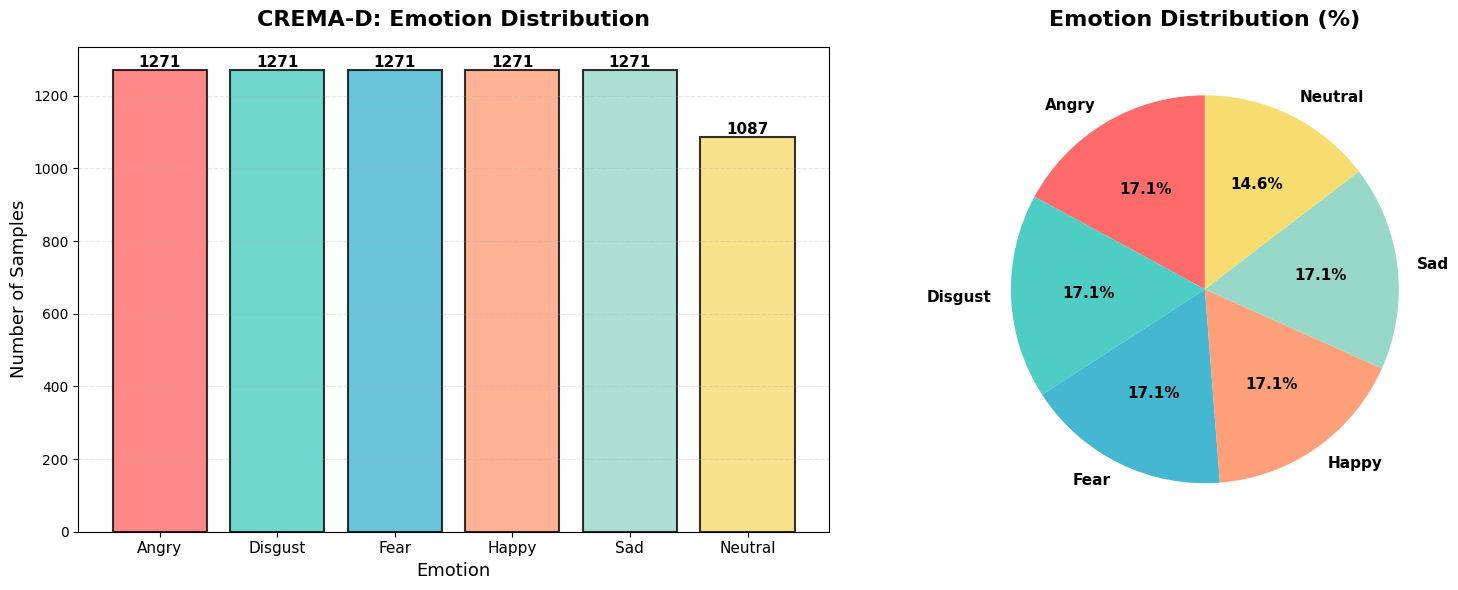


 Visualization saved: class_distribution.png


In [12]:
unique_labels, counts = np.unique(y, return_counts=True)

print("\n" + "=" * 70)
print("CLASS DISTRIBUTION ANALYSIS")
print("=" * 70)

distribution_df = pd.DataFrame({
    'Emotion': unique_labels,
    'Count': counts,
    'Percentage': (counts / len(y) * 100)
})

distribution_df = distribution_df.sort_values('Count', ascending=False)
print(distribution_df.to_string(index=False))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F']
bars = ax1.bar(distribution_df['Emotion'], distribution_df['Count'], 
               color=colors[:len(distribution_df)], edgecolor='black', 
               linewidth=1.5, alpha=0.8)

ax1.set_title('CREMA-D: Emotion Distribution', fontsize=16, fontweight='bold', pad=15)
ax1.set_xlabel('Emotion', fontsize=13)
ax1.set_ylabel('Number of Samples', fontsize=13)
ax1.tick_params(axis='x', rotation=0, labelsize=11)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

ax2.pie(distribution_df['Count'], labels=distribution_df['Emotion'], 
        colors=colors[:len(distribution_df)], autopct='%1.1f%%',
        startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
ax2.set_title('Emotion Distribution (%)', fontsize=16, fontweight='bold', pad=15)

plt.tight_layout()
plt.savefig('/kaggle/working/class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Visualization saved: class_distribution.png")

In [13]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

y_categorical = to_categorical(y_encoded)

num_classes = len(label_encoder.classes_)

print("=" * 70)
print("LABEL ENCODING")
print("=" * 70)
print(f"Number of classes: {num_classes}")
print(f"\nLabel Mapping:")
print("-" * 40)
for idx, class_name in enumerate(label_encoder.classes_):
    count = np.sum(y_encoded == idx)
    print(f"  {idx} -> {class_name:10s} ({count} samples)")

print(f"\nEncoded labels shape: {y_encoded.shape}")
print(f"Categorical labels shape: {y_categorical.shape}")
print("=" * 70)

LABEL ENCODING
Number of classes: 6

Label Mapping:
----------------------------------------
  0 -> Angry      (1271 samples)
  1 -> Disgust    (1271 samples)
  2 -> Fear       (1271 samples)
  3 -> Happy      (1271 samples)
  4 -> Neutral    (1087 samples)
  5 -> Sad        (1271 samples)

Encoded labels shape: (7442,)
Categorical labels shape: (7442, 6)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y_categorical, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_categorical
)

print("=" * 70)
print("DATA SPLITTING")
print("=" * 70)
print(f"Total samples: {len(X)}")
print(f"\nTraining set:")
print(f"  - Samples: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"  - Shape: {X_train.shape}")

print(f"\nTesting set:")
print(f"  - Samples: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")
print(f"  - Shape: {X_test.shape}")

print(f"\n" + "-" * 70)
print("Class distribution in splits:")
print("-" * 70)

train_dist = np.argmax(y_train, axis=1)
test_dist = np.argmax(y_test, axis=1)

for idx, class_name in enumerate(label_encoder.classes_):
    train_count = np.sum(train_dist == idx)
    test_count = np.sum(test_dist == idx)
    print(f"{class_name:10s}: Train={train_count:4d}, Test={test_count:4d}")

print("=" * 70)

DATA SPLITTING
Total samples: 7442

Training set:
  - Samples: 5953 (80.0%)
  - Shape: (5953, 40, 174)

Testing set:
  - Samples: 1489 (20.0%)
  - Shape: (1489, 40, 174)

----------------------------------------------------------------------
Class distribution in splits:
----------------------------------------------------------------------
Angry     : Train=1017, Test= 254
Disgust   : Train=1016, Test= 255
Fear      : Train=1017, Test= 254
Happy     : Train=1017, Test= 254
Neutral   : Train= 869, Test= 218
Sad       : Train=1017, Test= 254


In [15]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

print("=" * 70)
print("DATA PREPARATION FOR CNN")
print("=" * 70)
print(f"Training set shape:   {X_train.shape}")
print(f"Testing set shape:    {X_test.shape}")
print(f"\nInput shape for CNN:  {X_train.shape[1:]}")
print(f"\nDimension breakdown:")
print(f"  - Height (MFCC coefficients): {X_train.shape[1]}")
print(f"  - Width (Time frames): {X_train.shape[2]}")
print(f"  - Channels: {X_train.shape[3]}")
print(f"\nData type: {X_train.dtype}")
print(f"Value range: [{X_train.min():.2f}, {X_train.max():.2f}]")
print("=" * 70)

DATA PREPARATION FOR CNN
Training set shape:   (5953, 40, 174, 1)
Testing set shape:    (1489, 40, 174, 1)

Input shape for CNN:  (40, 174, 1)

Dimension breakdown:
  - Height (MFCC coefficients): 40
  - Width (Time frames): 174
  - Channels: 1

Data type: float32
Value range: [-1131.37, 217.57]


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense

def build_cnn_model(input_shape, num_classes):
    model = Sequential(name='Emotion_Recognition_CNN')
    
    # Block 1
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape, name='conv1_1'))
    model.add(BatchNormalization(name='bn1_1'))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='conv1_2'))
    model.add(BatchNormalization(name='bn1_2'))
    model.add(MaxPooling2D(pool_size=(2, 2), name='pool1'))
    model.add(Dropout(0.25, name='dropout1'))
    
    # Block 2
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='conv2_1'))
    model.add(BatchNormalization(name='bn2_1'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='conv2_2'))
    model.add(BatchNormalization(name='bn2_2'))
    model.add(MaxPooling2D(pool_size=(2, 2), name='pool2'))
    model.add(Dropout(0.3, name='dropout2'))
    
    # Block 3
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same', name='conv3_1'))
    model.add(BatchNormalization(name='bn3_1'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same', name='conv3_2'))
    model.add(BatchNormalization(name='bn3_2'))
    model.add(MaxPooling2D(pool_size=(2, 2), name='pool3'))
    model.add(Dropout(0.4, name='dropout3'))
    
    # Fully Connected Layers
    model.add(Flatten(name='flatten'))
    model.add(Dense(512, activation='relu', name='fc1'))
    model.add(BatchNormalization(name='bn_fc1'))
    model.add(Dropout(0.5, name='dropout_fc1'))
    model.add(Dense(256, activation='relu', name='fc2'))
    model.add(BatchNormalization(name='bn_fc2'))
    model.add(Dropout(0.4, name='dropout_fc2'))
    model.add(Dense(num_classes, activation='softmax', name='output'))
    
    return model

print(" CNN model architecture function created successfully!")

 CNN model architecture function created successfully!


In [17]:
print("=" * 70)
print("BUILDING CNN MODEL")
print("=" * 70)

model = build_cnn_model(input_shape=X_train.shape[1:], num_classes=num_classes)

print("Model created successfully!")

BUILDING CNN MODEL


I0000 00:00:1765036603.508537      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1765036603.509135      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model created successfully!


In [19]:
optimizer = Adam(learning_rate=0.0001)

model. compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("=" * 70)
print("MODEL COMPILED")
print("=" * 70)
print("Optimizer: Adam")
print("Learning Rate: 0.0001")
print("Loss Function: categorical_crossentropy")
print("Metrics: accuracy")
print("=" * 70)

MODEL COMPILED
Optimizer: Adam
Learning Rate: 0.0001
Loss Function: categorical_crossentropy
Metrics: accuracy


In [20]:
print("=" * 70)
print("MODEL SUMMARY")
print("=" * 70)

model.summary()

trainable_params = np. sum([np.prod(v. shape) for v in model.trainable_weights])
non_trainable_params = np.sum([np.prod(v.shape) for v in model.non_trainable_weights])
total_params = trainable_params + non_trainable_params

print("\n" + "=" * 70)
print("MODEL PARAMETERS")
print("=" * 70)
print(f"Total parameters:         {total_params:,}")
print(f"Trainable parameters:     {trainable_params:,}")
print(f"Non-trainable parameters: {non_trainable_params:,}")
print("=" * 70)

MODEL SUMMARY


Model: "Emotion_Recognition_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1_1 (Conv2D)                │ (None, 40, 174, 64)    │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1_1 (BatchNormalization)      │ (None, 40, 174, 64)    │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_2 (Conv2D)                │ (None, 40, 174, 64)    │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1_2 (BatchNormalization)      │ (None, 40, 174, 64)    │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 20, 87, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout1 (Dropout)              │ (None, 20, 87, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2_1 (Conv2D)                │ (None, 20, 87, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2_1 (BatchNormalization)      │ (None, 20, 87, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2_2 (Conv2D)                │ (None, 20, 87, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2_2 (BatchNormalization)      │ (None, 20, 87, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 10, 43, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout2 (Dropout)              │ (None, 10, 43, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3_1 (Conv2D)                │ (None, 10, 43, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3_1 (BatchNormalization)      │ (None, 10, 43, 256)    │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3_2 (Conv2D)                │ (None, 10, 43, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3_2 (BatchNormalization)      │ (None, 10, 43, 256)    │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 5, 21, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout3 (Dropout)              │ (None, 5, 21, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 26880)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 512)            │    13,763,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_fc1 (BatchNormalization)     │ (None, 512)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_fc1 (Dropout)           │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_fc2 (BatchNormalization)     │ (None, 256)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_fc2 (Dropout)           │ (None, 256)            │             

 Total params: 15,046,854 (57.40 MB)

 Trainable params: 15,043,526 (57.39 MB)

 Non-trainable params: 3,328 (13.00 KB)


MODEL PARAMETERS
Total parameters:         15,046,854
Trainable parameters:     15,043,526
Non-trainable parameters: 3,328


In [21]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=15,
    restore_best_weights=True,
    verbose=1,
    mode='max'
)

model_checkpoint = ModelCheckpoint(
    '/kaggle/working/best_audio_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1,
    mode='max'
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7,
    verbose=1,
    mode='min'
)

callbacks = [early_stopping, model_checkpoint, reduce_lr]

print("=" * 70)
print("CALLBACKS CONFIGURED")
print("=" * 70)
print("✓ EarlyStopping")
print("    - Monitor: val_accuracy")
print("    - Patience: 15 epochs")
print("    - Restore best weights: Yes")
print("\n✓ ModelCheckpoint")
print("    - Save path: /kaggle/working/best_audio_model.h5")
print("    - Monitor: val_accuracy")
print("    - Save best only: Yes")
print("\n✓ ReduceLROnPlateau")
print("    - Monitor: val_loss")
print("    - Factor: 0.5")
print("    - Patience: 5 epochs")
print("    - Min LR: 1e-7")
print("=" * 70)

CALLBACKS CONFIGURED
✓ EarlyStopping
    - Monitor: val_accuracy
    - Patience: 15 epochs
    - Restore best weights: Yes

✓ ModelCheckpoint
    - Save path: /kaggle/working/best_audio_model.h5
    - Monitor: val_accuracy
    - Save best only: Yes

✓ ReduceLROnPlateau
    - Monitor: val_loss
    - Factor: 0.5
    - Patience: 5 epochs
    - Min LR: 1e-7


In [22]:
print("\n" + "=" * 70)
print("TRAINING MODEL")
print("=" * 70)
print(f"Training samples: {len(X_train)}")
print(f"Validation samples: {len(X_test)}")
print(f"Batch size: {BATCH_SIZE}")
print(f"Epochs: {EPOCHS}")
print("=" * 70)
print("\nStarting training.. .\n")


history = model.fit(
    X_train, 
    y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
    verbose=1
)

print("\n" + "=" * 70)
print(" TRAINING COMPLETED!")
print("=" * 70)


TRAINING MODEL
Training samples: 5953
Validation samples: 1489
Batch size: 32
Epochs: 100

Starting training.. .

Epoch 1/100


I0000 00:00:1765036640.670369     137 service.cc:148] XLA service 0x7ea984002de0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1765036640.671294     137 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1765036640.671316     137 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1765036641.483627     137 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/187 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - accuracy: 0.1484 - loss: 2.7807 

I0000 00:00:1765036653.242212     137 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.2310 - loss: 2.5064
Epoch 1: val_accuracy improved from -inf to 0.17529, saving model to /kaggle/working/best_audio_model.h5


187/187 ━━━━━━━━━━━━━━━━━━━━ 40s 121ms/step - accuracy: 0.2312 - loss: 2.5056 - val_accuracy: 0.1753 - val_loss: 2.9039 - learning_rate: 1.0000e-04
Epoch 2/100
186/187 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.3421 - loss: 2.0512
Epoch 2: val_accuracy improved from 0.17529 to 0.20416, saving model to /kaggle/working/best_audio_model.h5


187/187 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.3420 - loss: 2.0511 - val_accuracy: 0.2042 - val_loss: 3.2072 - learning_rate: 1.0000e-04
Epoch 3/100
186/187 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.3340 - loss: 1.9709
Epoch 3: val_accuracy improved from 0.20416 to 0.26662, saving model to /kaggle/working/best_audio_model.h5


187/187 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.3340 - loss: 1.9706 - val_accuracy: 0.2666 - val_loss: 2.3239 - learning_rate: 1.0000e-04
Epoch 4/100
186/187 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.3590 - loss: 1.8236
Epoch 4: val_accuracy did not improve from 0.26662
187/187 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - accuracy: 0.3590 - loss: 1.8235 - val_accuracy: 0.2471 - val_loss: 2.4522 - learning_rate: 1.0000e-04
Epoch 5/100
186/187 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.3746 - loss: 1.7536
Epoch 5: val_accuracy improved from 0.26662 to 0.30893, saving model to /kaggle/working/best_audio_model.h5


187/187 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.3747 - loss: 1.7534 - val_accuracy: 0.3089 - val_loss: 2.3103 - learning_rate: 1.0000e-04
Epoch 6/100
186/187 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.3904 - loss: 1.6765
Epoch 6: val_accuracy improved from 0.30893 to 0.34990, saving model to /kaggle/working/best_audio_model.h5


187/187 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.3904 - loss: 1.6766 - val_accuracy: 0.3499 - val_loss: 1.9355 - learning_rate: 1.0000e-04
Epoch 7/100
186/187 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.3978 - loss: 1.6132
Epoch 7: val_accuracy improved from 0.34990 to 0.37206, saving model to /kaggle/working/best_audio_model.h5


187/187 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.3979 - loss: 1.6132 - val_accuracy: 0.3721 - val_loss: 1.8867 - learning_rate: 1.0000e-04
Epoch 8/100
186/187 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.4270 - loss: 1.5820
Epoch 8: val_accuracy did not improve from 0.37206
187/187 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.4269 - loss: 1.5817 - val_accuracy: 0.3002 - val_loss: 2.5541 - learning_rate: 1.0000e-04
Epoch 9/100
186/187 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4285 - loss: 1.5404
Epoch 9: val_accuracy improved from 0.37206 to 0.39490, saving model to /kaggle/working/best_audio_model.h5


187/187 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.4285 - loss: 1.5402 - val_accuracy: 0.3949 - val_loss: 1.7413 - learning_rate: 1.0000e-04
Epoch 10/100
186/187 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4451 - loss: 1.4940
Epoch 10: val_accuracy did not improve from 0.39490
187/187 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.4451 - loss: 1.4940 - val_accuracy: 0.2478 - val_loss: 2.1728 - learning_rate: 1.0000e-04
Epoch 11/100
186/187 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4660 - loss: 1.4210
Epoch 11: val_accuracy did not improve from 0.39490
187/187 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.4659 - loss: 1.4212 - val_accuracy: 0.2814 - val_loss: 2.4317 - learning_rate: 1.0000e-04
Epoch 12/100
186/187 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4460 - loss: 1.4550
Epoch 12: val_accuracy did not improve from 0.39490
187/187 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.4462 - loss: 1.4546 - val_accuracy: 0.3768 - val_loss: 1.8448 - learning_rate: 

187/187 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.4943 - loss: 1.3588 - val_accuracy: 0.4983 - val_loss: 1.3628 - learning_rate: 1.0000e-04
Epoch 15/100
186/187 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5005 - loss: 1.3255
Epoch 15: val_accuracy did not improve from 0.49832
187/187 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.5005 - loss: 1.3253 - val_accuracy: 0.3465 - val_loss: 1.8812 - learning_rate: 1.0000e-04
Epoch 16/100
186/187 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5147 - loss: 1.2990
Epoch 16: val_accuracy did not improve from 0.49832
187/187 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.5148 - loss: 1.2986 - val_accuracy: 0.4889 - val_loss: 1.3945 - learning_rate: 1.0000e-04
Epoch 17/100
186/187 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5207 - loss: 1.2388
Epoch 17: val_accuracy did not improve from 0.49832
187/187 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.5208 - loss: 1.2387 - val_accuracy: 0.4446 - val_loss: 1.4870 - learning_rate: 

187/187 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.5604 - loss: 1.1699 - val_accuracy: 0.5165 - val_loss: 1.2676 - learning_rate: 1.0000e-04
Epoch 20/100
186/187 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5614 - loss: 1.1595
Epoch 20: val_accuracy did not improve from 0.51645
187/187 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.5612 - loss: 1.1597 - val_accuracy: 0.3902 - val_loss: 1.6788 - learning_rate: 1.0000e-04
Epoch 21/100
186/187 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5761 - loss: 1.1043
Epoch 21: val_accuracy did not improve from 0.51645
187/187 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.5759 - loss: 1.1046 - val_accuracy: 0.4473 - val_loss: 1.5243 - learning_rate: 1.0000e-04
Epoch 22/100
186/187 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5718 - loss: 1.1220
Epoch 22: val_accuracy did not improve from 0.51645
187/187 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.5718 - loss: 1.1221 - val_accuracy: 0.5118 - val_loss: 1.3306 - learning_rate: 

187/187 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.6114 - loss: 1.0333 - val_accuracy: 0.5339 - val_loss: 1.2991 - learning_rate: 5.0000e-05
Epoch 26/100
186/187 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6177 - loss: 0.9877
Epoch 26: val_accuracy did not improve from 0.53392
187/187 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.6178 - loss: 0.9877 - val_accuracy: 0.4338 - val_loss: 1.6426 - learning_rate: 5.0000e-05
Epoch 27/100
186/187 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6314 - loss: 0.9676
Epoch 27: val_accuracy improved from 0.53392 to 0.53660, saving model to /kaggle/working/best_audio_model.h5


187/187 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.6314 - loss: 0.9677 - val_accuracy: 0.5366 - val_loss: 1.2847 - learning_rate: 5.0000e-05
Epoch 28/100
186/187 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6431 - loss: 0.9299
Epoch 28: val_accuracy improved from 0.53660 to 0.57152, saving model to /kaggle/working/best_audio_model.h5


187/187 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.6431 - loss: 0.9301 - val_accuracy: 0.5715 - val_loss: 1.1641 - learning_rate: 5.0000e-05
Epoch 29/100
186/187 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6541 - loss: 0.9236
Epoch 29: val_accuracy did not improve from 0.57152
187/187 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.6540 - loss: 0.9237 - val_accuracy: 0.5205 - val_loss: 1.3737 - learning_rate: 5.0000e-05
Epoch 30/100
186/187 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6562 - loss: 0.9096
Epoch 30: val_accuracy improved from 0.57152 to 0.57287, saving model to /kaggle/working/best_audio_model.h5


187/187 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.6562 - loss: 0.9096 - val_accuracy: 0.5729 - val_loss: 1.1497 - learning_rate: 5.0000e-05
Epoch 31/100
186/187 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6712 - loss: 0.8629
Epoch 31: val_accuracy did not improve from 0.57287
187/187 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.6711 - loss: 0.8632 - val_accuracy: 0.5003 - val_loss: 1.3972 - learning_rate: 5.0000e-05
Epoch 32/100
186/187 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6581 - loss: 0.8784
Epoch 32: val_accuracy did not improve from 0.57287
187/187 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.6581 - loss: 0.8785 - val_accuracy: 0.5709 - val_loss: 1.1588 - learning_rate: 5.0000e-05
Epoch 33/100
186/187 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6700 - loss: 0.8667
Epoch 33: val_accuracy did not improve from 0.57287
187/187 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.6700 - loss: 0.8668 - val_accuracy: 0.4634 - val_loss: 1.5122 - learning_rate: 

187/187 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.6781 - loss: 0.8347 - val_accuracy: 0.5870 - val_loss: 1.1535 - learning_rate: 5.0000e-05
Epoch 35/100
186/187 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6950 - loss: 0.7925
Epoch 35: val_accuracy improved from 0.58697 to 0.59033, saving model to /kaggle/working/best_audio_model.h5



Epoch 35: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
187/187 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.6950 - loss: 0.7925 - val_accuracy: 0.5903 - val_loss: 1.2172 - learning_rate: 5.0000e-05
Epoch 36/100
186/187 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7114 - loss: 0.7630
Epoch 36: val_accuracy improved from 0.59033 to 0.59436, saving model to /kaggle/working/best_audio_model.h5


187/187 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.7113 - loss: 0.7632 - val_accuracy: 0.5944 - val_loss: 1.1283 - learning_rate: 2.5000e-05
Epoch 37/100
186/187 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7024 - loss: 0.7756
Epoch 37: val_accuracy did not improve from 0.59436
187/187 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.7025 - loss: 0.7756 - val_accuracy: 0.5312 - val_loss: 1.3553 - learning_rate: 2.5000e-05
Epoch 38/100
186/187 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7224 - loss: 0.7277
Epoch 38: val_accuracy improved from 0.59436 to 0.60712, saving model to /kaggle/working/best_audio_model.h5


187/187 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.7223 - loss: 0.7280 - val_accuracy: 0.6071 - val_loss: 1.0914 - learning_rate: 2.5000e-05
Epoch 39/100
186/187 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7310 - loss: 0.7230
Epoch 39: val_accuracy did not improve from 0.60712
187/187 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.7309 - loss: 0.7232 - val_accuracy: 0.5567 - val_loss: 1.2721 - learning_rate: 2.5000e-05
Epoch 40/100
186/187 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7194 - loss: 0.7274
Epoch 40: val_accuracy did not improve from 0.60712
187/187 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.7194 - loss: 0.7275 - val_accuracy: 0.5917 - val_loss: 1.1308 - learning_rate: 2.5000e-05
Epoch 41/100
186/187 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7277 - loss: 0.7191
Epoch 41: val_accuracy did not improve from 0.60712
187/187 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.7277 - loss: 0.7190 - val_accuracy: 0.5930 - val_loss: 1.1726 - learning_rate: 

187/187 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.7280 - loss: 0.7193 - val_accuracy: 0.6098 - val_loss: 1.0965 - learning_rate: 2.5000e-05
Epoch 44/100
186/187 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7436 - loss: 0.6903
Epoch 44: val_accuracy did not improve from 0.60981
187/187 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.7436 - loss: 0.6902 - val_accuracy: 0.6004 - val_loss: 1.1334 - learning_rate: 2.5000e-05
Epoch 45/100
186/187 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7486 - loss: 0.6751
Epoch 45: val_accuracy did not improve from 0.60981
187/187 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.7485 - loss: 0.6752 - val_accuracy: 0.5897 - val_loss: 1.1674 - learning_rate: 2.5000e-05
Epoch 46/100
186/187 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7458 - loss: 0.6631
Epoch 46: val_accuracy did not improve from 0.60981
187/187 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.7459 - loss: 0.6631 - val_accuracy: 0.5977 - val_loss: 1.1780 - learning_rate: 

187/187 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.7677 - loss: 0.6209 - val_accuracy: 0.6138 - val_loss: 1.1167 - learning_rate: 1.2500e-05
Epoch 49/100
186/187 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7684 - loss: 0.6304
Epoch 49: val_accuracy did not improve from 0.61383
187/187 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.7684 - loss: 0.6302 - val_accuracy: 0.5977 - val_loss: 1.1655 - learning_rate: 1.2500e-05
Epoch 50/100
186/187 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7648 - loss: 0.6291
Epoch 50: val_accuracy did not improve from 0.61383
187/187 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.7648 - loss: 0.6290 - val_accuracy: 0.6011 - val_loss: 1.1626 - learning_rate: 1.2500e-05
Epoch 51/100
186/187 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7734 - loss: 0.6041
Epoch 51: val_accuracy did not improve from 0.61383
187/187 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.7734 - loss: 0.6039 - val_accuracy: 0.6058 - val_loss: 1.1353 - learning_rate: 

In [23]:
print("=" * 70)
print("MODEL EVALUATION")
print("=" * 70)

train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f"Training Loss:     {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")

print("-" * 70)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss:         {test_loss:.4f}")
print(f"Test Accuracy:     {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

print("=" * 70)

MODEL EVALUATION
Training Loss:     0.3200
Training Accuracy: 0.8990 (89.90%)
----------------------------------------------------------------------
Test Loss:         1.1167
Test Accuracy:     0.6138 (61.38%)


In [25]:
model.save('/kaggle/working/final_audio_model.h5')
print(" Model saved: final_audio_model. h5")

model.save_weights('/kaggle/working/model_weights.weights.h5')
print(" Weights saved: model_weights.weights. h5")

np.save('/kaggle/working/label_encoder_classes. npy', label_encoder.classes_)
print(" Label encoder saved: label_encoder_classes.npy")

history_df = pd.DataFrame(history.history)
history_df.to_csv('/kaggle/working/training_history.csv', index=False)
print(" Training history saved: training_history.csv")

print("\n" + "=" * 70)
print(" ALL FILES SAVED SUCCESSFULLY")
print("=" * 70)

 Model saved: final_audio_model. h5
 Weights saved: model_weights.weights. h5
 Label encoder saved: label_encoder_classes.npy
 Training history saved: training_history.csv

 ALL FILES SAVED SUCCESSFULLY


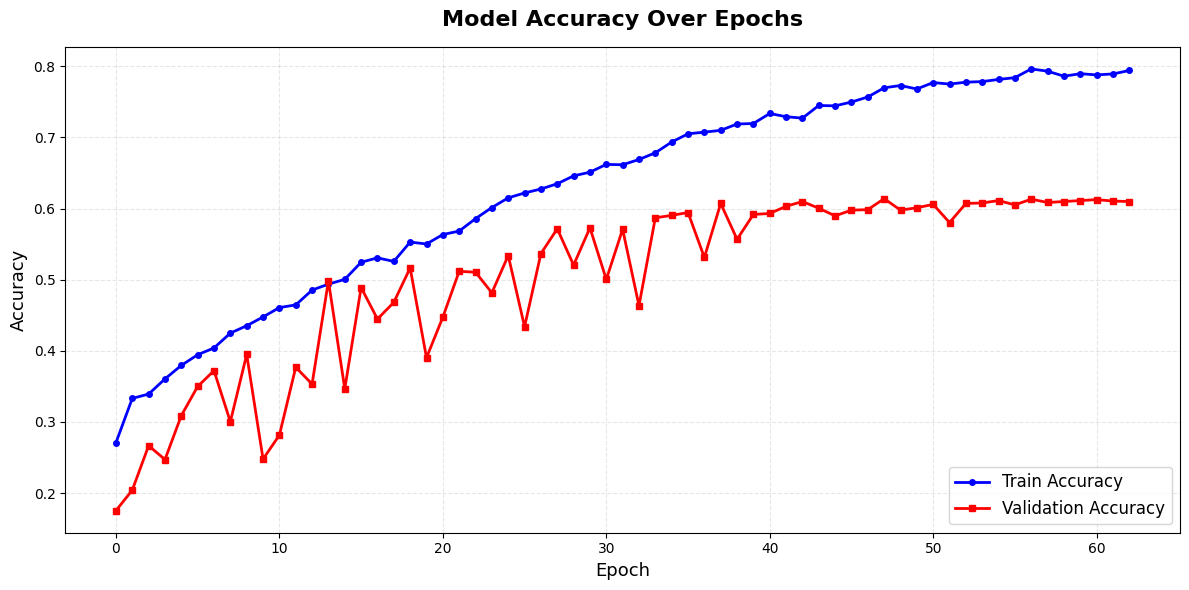

Best Training Accuracy: 0.7962
Best Validation Accuracy: 0.6138


In [26]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy', 
         linewidth=2, marker='o', markersize=4, color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', 
         linewidth=2, marker='s', markersize=4, color='red')
plt.title('Model Accuracy Over Epochs', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Epoch', fontsize=13)
plt.ylabel('Accuracy', fontsize=13)
plt.legend(fontsize=12, loc='lower right')
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('/kaggle/working/accuracy_plot.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Best Training Accuracy: {max(history. history['accuracy']):.4f}")
print(f"Best Validation Accuracy: {max(history. history['val_accuracy']):.4f}")

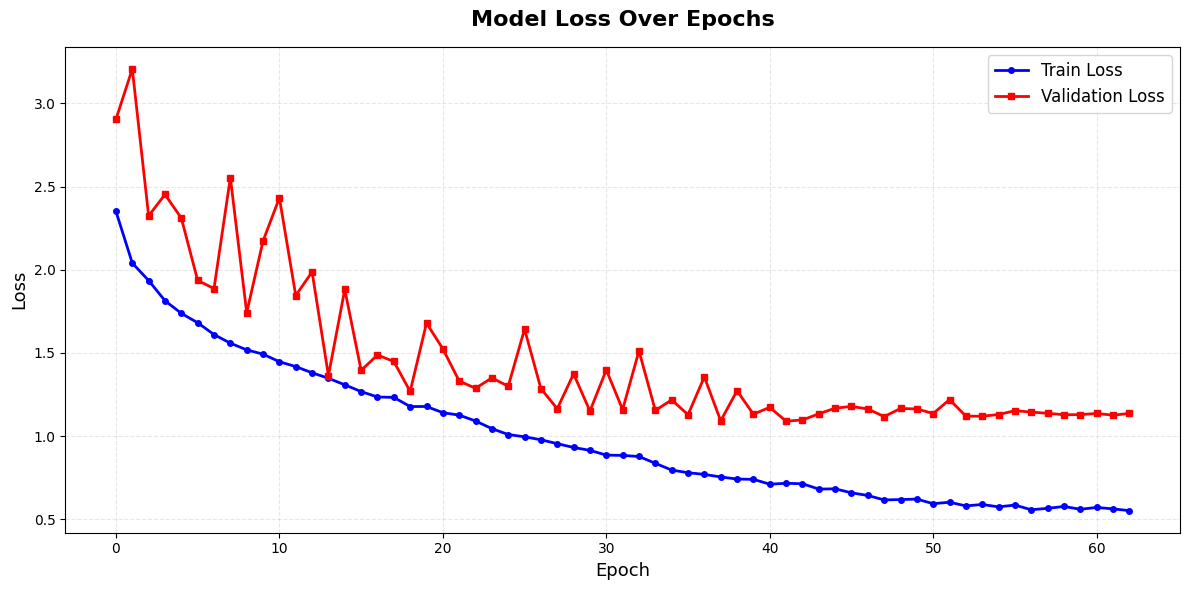

ValueError: Format specifier missing precision

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss', 
         linewidth=2, marker='o', markersize=4, color='blue')
plt.plot(history. history['val_loss'], label='Validation Loss', 
         linewidth=2, marker='s', markersize=4, color='red')
plt.title('Model Loss Over Epochs', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Epoch', fontsize=13)
plt.ylabel('Loss', fontsize=13)
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('/kaggle/working/loss_plot.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Best Training Loss: {min(history.history['loss']):. 4f}")
print(f"Best Validation Loss: {min(history.history['val_loss']):.4f}")

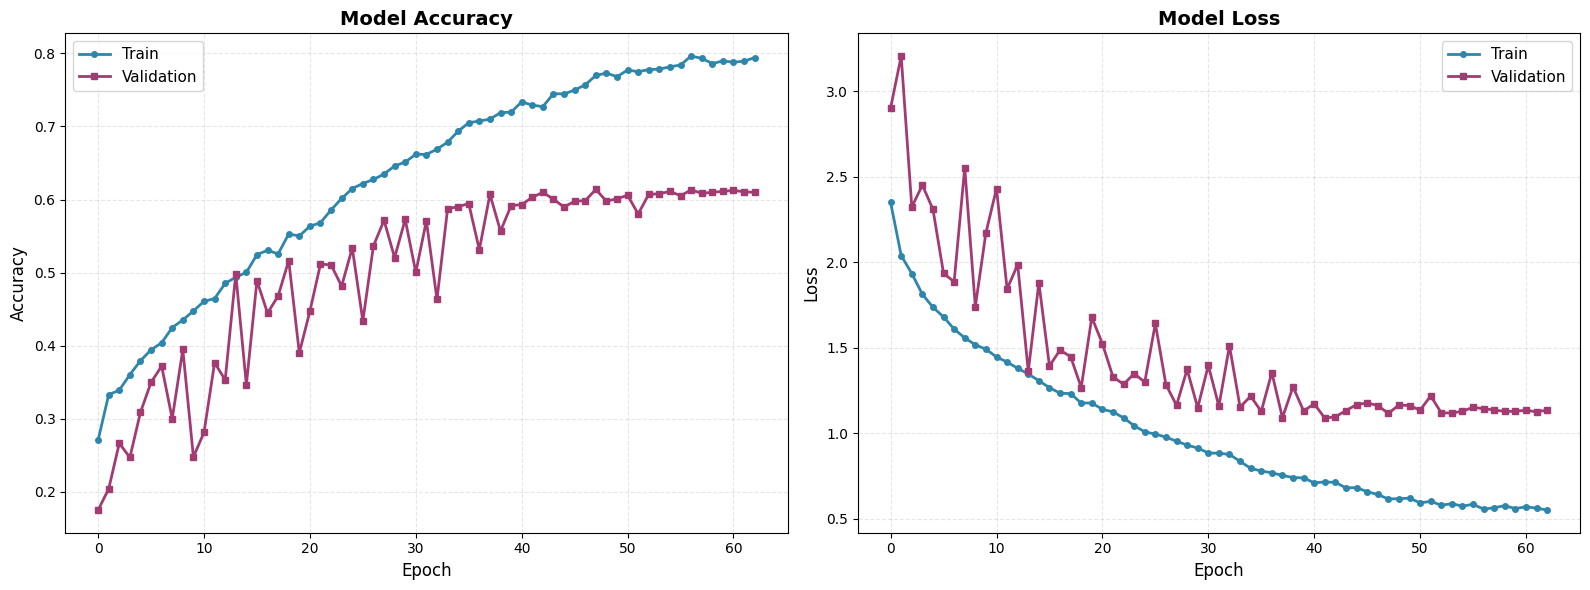

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Accuracy
ax1.plot(history.history['accuracy'], label='Train', 
         linewidth=2, color='#2E86AB', marker='o', markersize=4)
ax1.plot(history.history['val_accuracy'], label='Validation', 
         linewidth=2, color='#A23B72', marker='s', markersize=4)
ax1.set_title('Model Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3, linestyle='--')

# Loss
ax2.plot(history.history['loss'], label='Train', 
         linewidth=2, color='#2E86AB', marker='o', markersize=4)
ax2. plot(history.history['val_loss'], label='Validation', 
         linewidth=2, color='#A23B72', marker='s', markersize=4)
ax2.set_title('Model Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('/kaggle/working/training_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

In [29]:
print("=" * 70)
print("GENERATING PREDICTIONS")
print("=" * 70)

y_pred = model.predict(X_test, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print(f"\nPredictions shape: {y_pred.shape}")
print(f"Predicted classes shape: {y_pred_classes. shape}")

print("\n" + "-" * 70)
print("Sample Predictions:")
print("-" * 70)
for i in range(10):
    true_label = label_encoder.classes_[y_test_classes[i]]
    pred_label = label_encoder. classes_[y_pred_classes[i]]
    confidence = y_pred[i][y_pred_classes[i]] * 100
    match = "✓" if true_label == pred_label else "✗"
    print(f"{match} True: {true_label:10s} | Pred: {pred_label:10s} | Conf: {confidence:5.2f}%")

GENERATING PREDICTIONS
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step

Predictions shape: (1489, 6)
Predicted classes shape: (1489,)

----------------------------------------------------------------------
Sample Predictions:
----------------------------------------------------------------------
✓ True: Fear       | Pred: Fear       | Conf: 94.85%
✓ True: Angry      | Pred: Angry      | Conf: 99.98%
✓ True: Disgust    | Pred: Disgust    | Conf: 56.13%
✓ True: Angry      | Pred: Angry      | Conf: 52.83%
✗ True: Fear       | Pred: Sad        | Conf: 49.30%
✗ True: Sad        | Pred: Fear       | Conf: 65.24%
✓ True: Disgust    | Pred: Disgust    | Conf: 54.72%
✓ True: Fear       | Pred: Fear       | Conf: 88.92%
✓ True: Angry      | Pred: Angry      | Conf: 99.99%
✗ True: Happy      | Pred: Angry      | Conf: 54.38%


In [30]:
print("\n" + "=" * 70)
print("CLASSIFICATION REPORT")
print("=" * 70)

report = classification_report(
    y_test_classes, 
    y_pred_classes, 
    target_names=label_encoder.classes_,
    digits=4
)
print(report)

with open('/kaggle/working/classification_report.txt', 'w') as f:
    f. write("CLASSIFICATION REPORT\n")
    f.write("=" * 70 + "\n\n")
    f.write(report)

print(" Classification report saved: classification_report.txt")


CLASSIFICATION REPORT
              precision    recall  f1-score   support

       Angry     0.8079    0.7283    0.7660       254
     Disgust     0.6324    0.5059    0.5621       255
        Fear     0.4552    0.7402    0.5637       254
       Happy     0.7294    0.4882    0.5849       254
     Neutral     0.6965    0.6422    0.6683       218
         Sad     0.5441    0.5827    0.5627       254

    accuracy                         0.6138      1489
   macro avg     0.6442    0.6146    0.6180      1489
weighted avg     0.6430    0.6138    0.6167      1489

 Classification report saved: classification_report.txt


ValueError: Format ' png' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff, webp)

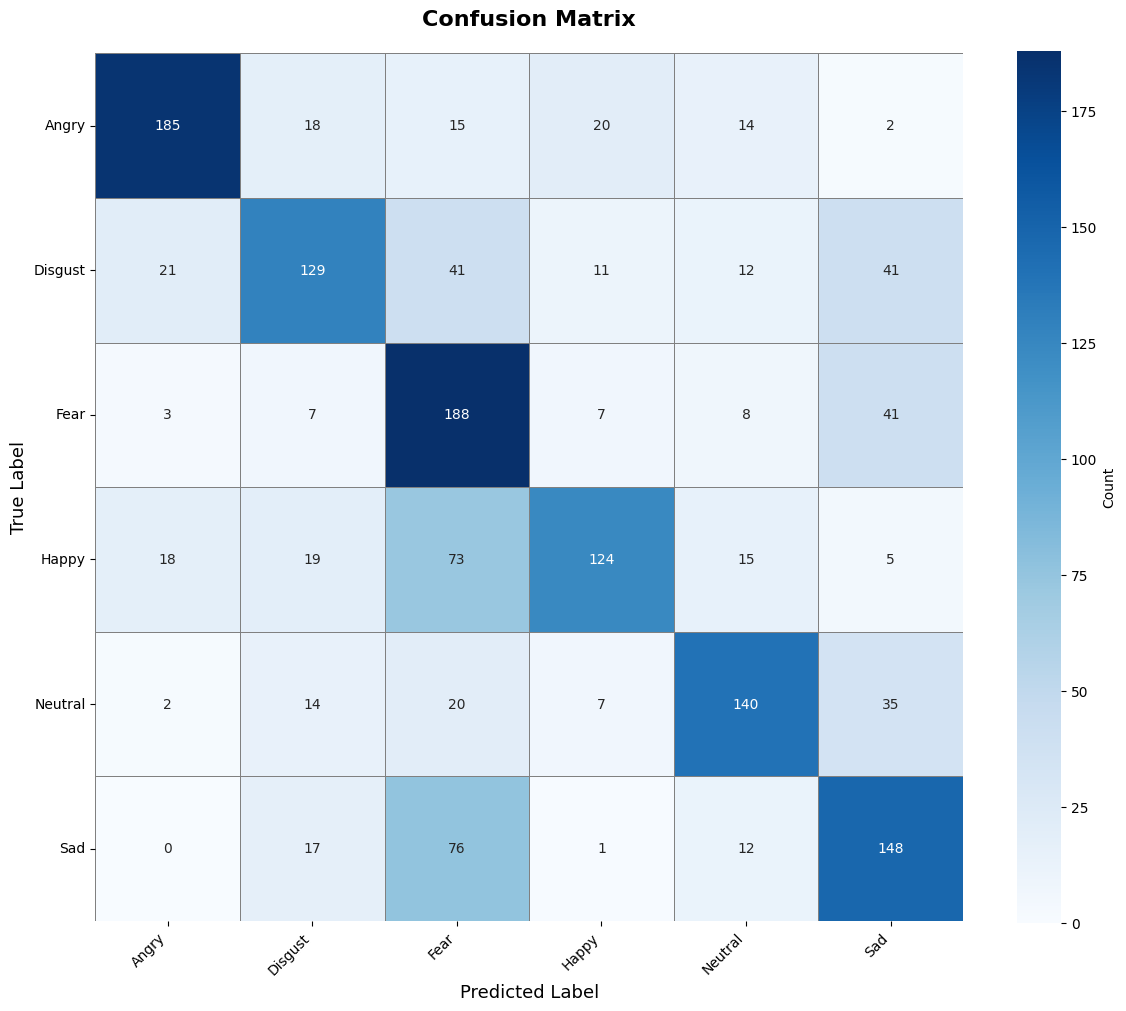

In [31]:
cm = confusion_matrix(y_test_classes, y_pred_classes)

plt. figure(figsize=(12, 10))
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues',
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_,
    cbar_kws={'label': 'Count'},
    square=True,
    linewidths=0.5,
    linecolor='gray'
)
plt.title('Confusion Matrix', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('True Label', fontsize=13)
plt.xlabel('Predicted Label', fontsize=13)
plt. xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('/kaggle/working/confusion_matrix. png', dpi=300, bbox_inches='tight')
plt. show()

print(" Confusion matrix saved: confusion_matrix.png")

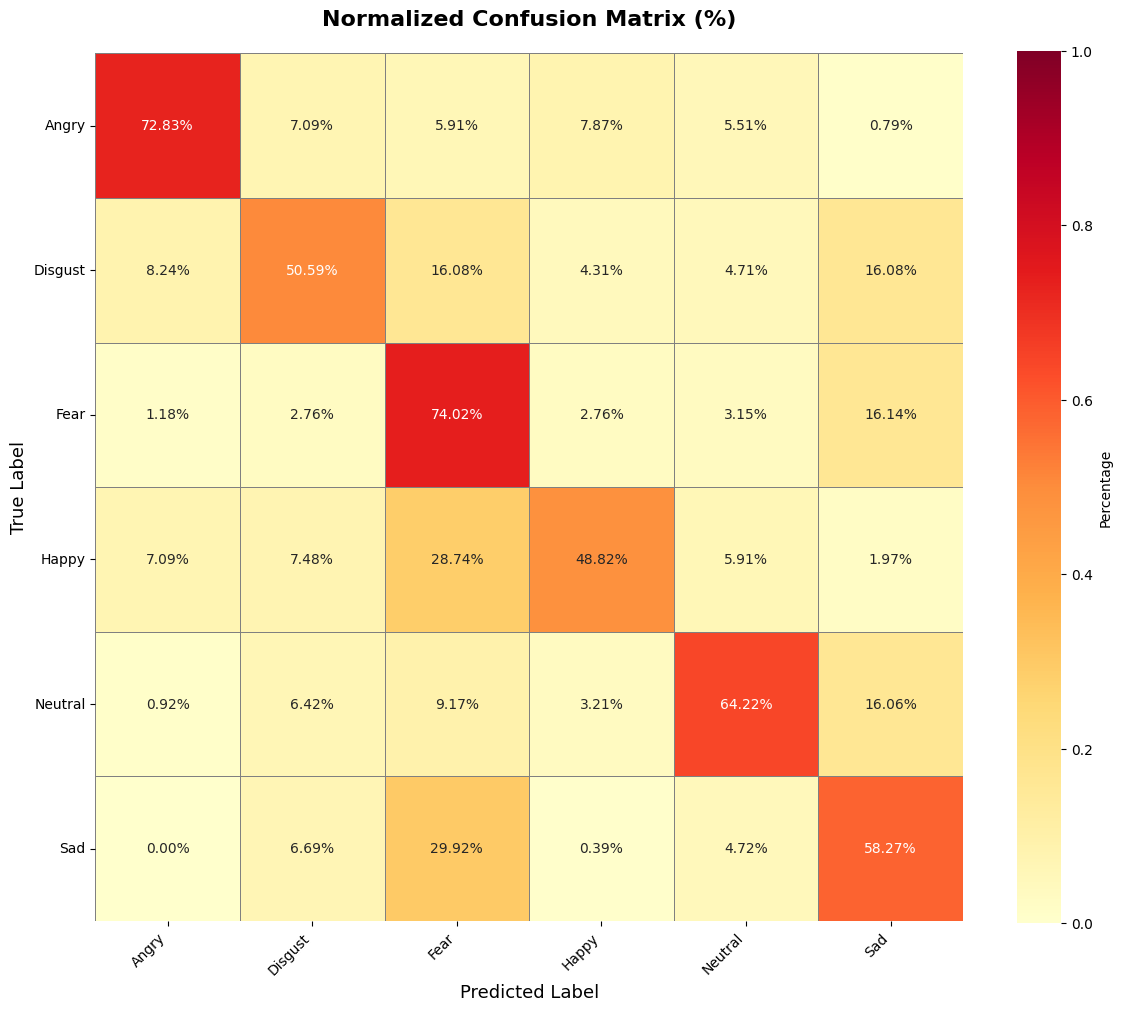

✓ Normalized confusion matrix saved


In [32]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(12, 10))
sns.heatmap(
    cm_normalized, 
    annot=True, 
    fmt='.2%', 
    cmap='YlOrRd',
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder. classes_,
    cbar_kws={'label': 'Percentage'},
    square=True,
    linewidths=0.5,
    linecolor='gray',
    vmin=0,
    vmax=1
)
plt.title('Normalized Confusion Matrix (%)', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('True Label', fontsize=13)
plt. xlabel('Predicted Label', fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('/kaggle/working/confusion_matrix_normalized.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Normalized confusion matrix saved")

PER-CLASS ACCURACY
  Class  Accuracy  Correct  Total
   Fear  0.740157      188    254
  Angry  0.728346      185    254
Neutral  0.642202      140    218
    Sad  0.582677      148    254
Disgust  0.505882      129    255
  Happy  0.488189      124    254


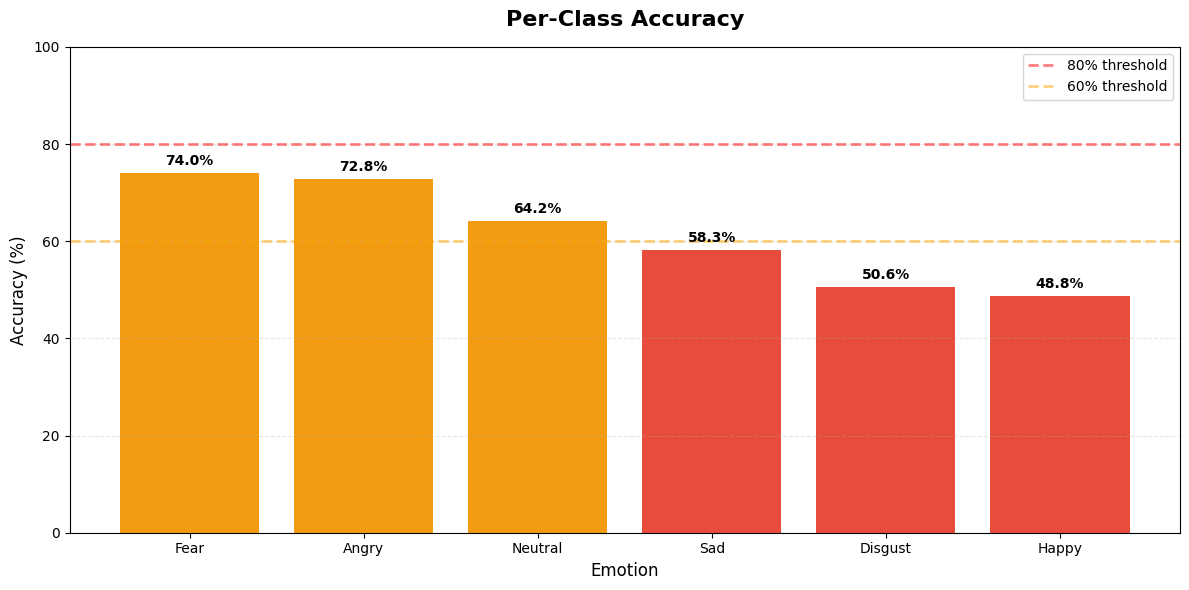


 Per-class accuracy saved: per_class_accuracy.csv


In [33]:
class_accuracy = cm.diagonal() / cm.sum(axis=1)

print("=" * 70)
print("PER-CLASS ACCURACY")
print("=" * 70)

accuracy_df = pd.DataFrame({
    'Class': label_encoder.classes_,
    'Accuracy': class_accuracy,
    'Correct': cm.diagonal(),
    'Total': cm.sum(axis=1)
})

accuracy_df = accuracy_df.sort_values('Accuracy', ascending=False)
print(accuracy_df.to_string(index=False))

plt.figure(figsize=(12, 6))
colors = ['#2ECC71' if x >= 0.8 else '#F39C12' if x >= 0.6 else '#E74C3C' 
          for x in accuracy_df['Accuracy']]
bars = plt.bar(range(len(accuracy_df)), accuracy_df['Accuracy']*100, color=colors)

plt.title('Per-Class Accuracy', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Emotion', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.xticks(range(len(accuracy_df)), accuracy_df['Class'], rotation=0)
plt.ylim([0, 100])
plt. axhline(y=80, color='red', linestyle='--', alpha=0.5, linewidth=2, label='80% threshold')
plt.axhline(y=60, color='orange', linestyle='--', alpha=0.5, linewidth=2, label='60% threshold')

for i, (bar, acc) in enumerate(zip(bars, accuracy_df['Accuracy']*100)):
    plt.text(bar.get_x() + bar.get_width()/2., acc + 1,
            f'{acc:.1f}%',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt. legend()
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt. tight_layout()
plt.savefig('/kaggle/working/per_class_accuracy.png', dpi=300, bbox_inches='tight')
plt.show()

accuracy_df. to_csv('/kaggle/working/per_class_accuracy.csv', index=False)
print("\n Per-class accuracy saved: per_class_accuracy.csv")

In [34]:
import numpy as np

def predict_single_audio(model, label_encoder, audio_file_path, max_pad_len=174, n_mfcc=40):
    """
    التنبؤ بتصنيف ملف صوتي واحد
    """
    
    mfcc = extract_features(audio_file_path, max_pad_len=max_pad_len, n_mfcc=n_mfcc)
    
    if mfcc is None:
        print("Error: Could not extract features from audio file")
        return None, None, None
    
    mfcc = mfcc[np.newaxis, ..., np.newaxis]
    
    # التنبؤ
    prediction = model.predict(mfcc, verbose=0)
    predicted_class_index = np.argmax(prediction)
    predicted_class = label_encoder.classes_[predicted_class_index]
    confidence = prediction[0][predicted_class_index]
    
    top_3_indices = np.argsort(prediction[0])[-3:][::-1]
    top_3_classes = [label_encoder.classes_[i] for i in top_3_indices]
    top_3_confidences = [prediction[0][i] for i in top_3_indices]
    
    return predicted_class, confidence, list(zip(top_3_classes, top_3_confidences))

print(" Prediction function created successfully!")

 Prediction function created successfully!


In [35]:
test_files = [f for f in os.listdir(DATA_PATH) if f.endswith('.wav')][:5]

print("=" * 70)
print("TESTING PREDICTION FUNCTION")
print("=" * 70)

for test_file in test_files:
    file_path = os.path.join(DATA_PATH, test_file)
    
    parts = test_file.replace('.wav', '').split('_')
    true_emotion = EMOTION_MAP. get(parts[2], 'Unknown')
    

    predicted_class, confidence, top_3 = predict_single_audio(
        model, label_encoder, file_path, MAX_PAD_LEN, N_MFCC
    )
    
    if predicted_class:
        match = "✓" if predicted_class == true_emotion else "✗"
        print(f"\n{match} File: {test_file}")
        print(f"   True Emotion: {true_emotion}")
        print(f"   Predicted: {predicted_class} ({confidence*100:.2f}%)")
        print(f"   Top 3:")
        for i, (cls, conf) in enumerate(top_3, 1):
            print(f"      {i}. {cls}: {conf*100:.2f}%")

print("\n" + "=" * 70)

TESTING PREDICTION FUNCTION

✓ File: 1028_TSI_DIS_XX.wav
   True Emotion: Disgust
   Predicted: Disgust (84.33%)
   Top 3:
      1. Disgust: 84.33%
      2. Sad: 15.39%
      3. Fear: 0.13%

✓ File: 1075_IEO_HAP_LO.wav
   True Emotion: Happy
   Predicted: Happy (93.07%)
   Top 3:
      1. Happy: 93.07%
      2. Fear: 5.32%
      3. Angry: 0.78%

✓ File: 1084_ITS_HAP_XX.wav
   True Emotion: Happy
   Predicted: Happy (49.00%)
   Top 3:
      1. Happy: 49.00%
      2. Fear: 43.11%
      3. Neutral: 5.95%

✗ File: 1067_IWW_DIS_XX.wav
   True Emotion: Disgust
   Predicted: Sad (43.08%)
   Top 3:
      1. Sad: 43.08%
      2. Disgust: 28.74%
      3. Fear: 27.35%

✓ File: 1066_TIE_DIS_XX.wav
   True Emotion: Disgust
   Predicted: Disgust (82.20%)
   Top 3:
      1. Disgust: 82.20%
      2. Happy: 8.06%
      3. Neutral: 3.80%



In [36]:
print("\n" + "=" * 70)
print(" FINAL PROJECT SUMMARY ")
print("=" * 70)

print(f"\n📊 DATASET INFORMATION:")
if 'X' in locals():
    print(f"   • Total samples: {len(X):,}")
    print(f"   • Training samples: {len(X_train):,}")
    print(f"   • Testing samples: {len(X_test):,}")
    print(f"   • Number of emotions: {num_classes}")
    print(f"   • Emotions: {', '.join(label_encoder.classes_)}")

print(f"\n MODEL ARCHITECTURE:")
print(f"   • Type: CNN (Convolutional Neural Network)")
print(f"   • Total parameters: {total_params:,}") 
print(f"   • Trainable parameters: {trainable_params:,}")
print(f"   • Layers: 3 Conv Blocks + 2 FC Layers")

print(f"\n MODEL PERFORMANCE:")
print(f"   • Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"   • Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"   • Training Loss: {train_loss:.4f}")
print(f"   • Test Loss: {test_loss:.4f}")

print(f"\n TRAINING HISTORY:")
print(f"   • Best Training Accuracy: {max(history.history['accuracy']):.4f}")
print(f"   • Best Validation Accuracy: {max(history.history['val_accuracy']):.4f}")
print(f"   • Best Training Loss: {min(history.history['loss']):.4f}")
print(f"   • Best Validation Loss: {min(history.history['val_loss']):.4f}")

print(f"\n SAVED FILES:")
print(f"   ✓ final_audio_model.h5")
print(f"   ✓ best_audio_model.h5")
print(f"   ✓ model_weights.h5")
print(f"   ✓ label_encoder_classes.npy")
print(f"   ✓ training_history.csv")
print(f"   ✓ classification_report.txt")
print(f"   ✓ per_class_accuracy.csv")
print(f"   ✓ class_distribution.png")
print(f"   ✓ accuracy_plot.png")
print(f"   ✓ loss_plot.png")
print(f"   ✓ training_metrics.png")
print(f"   ✓ confusion_matrix.png")
print(f"   ✓ confusion_matrix_normalized.png")
print(f"   ✓ per_class_accuracy.png")

print("\n" + "=" * 70)
print(" PROJECT COMPLETED SUCCESSFULLY!")
print("=" * 70)
print("\n🚀 Ready for deployment and further improvements!")


 FINAL PROJECT SUMMARY 

📊 DATASET INFORMATION:
   • Total samples: 7,442
   • Training samples: 5,953
   • Testing samples: 1,489
   • Number of emotions: 6
   • Emotions: Angry, Disgust, Fear, Happy, Neutral, Sad

 MODEL ARCHITECTURE:
   • Type: CNN (Convolutional Neural Network)
   • Total parameters: 15,046,854
   • Trainable parameters: 15,043,526
   • Layers: 3 Conv Blocks + 2 FC Layers

 MODEL PERFORMANCE:
   • Training Accuracy: 0.8990 (89.90%)
   • Test Accuracy: 0.6138 (61.38%)
   • Training Loss: 0.3200
   • Test Loss: 1.1167

 TRAINING HISTORY:
   • Best Training Accuracy: 0.7962
   • Best Validation Accuracy: 0.6138
   • Best Training Loss: 0.5513
   • Best Validation Loss: 1.0890

 SAVED FILES:
   ✓ final_audio_model.h5
   ✓ best_audio_model.h5
   ✓ model_weights.h5
   ✓ label_encoder_classes.npy
   ✓ training_history.csv
   ✓ classification_report.txt
   ✓ per_class_accuracy.csv
   ✓ class_distribution.png
   ✓ accuracy_plot.png
   ✓ loss_plot.png
   ✓ training_metrics.

In [40]:
import shutil
import os

print("=" * 70)
print(" CREATING MODEL PACKAGE")
print("=" * 70)

output_dir = '/kaggle/working/audio_emotion_model'
os.makedirs(output_dir, exist_ok=True)

print("\n Available files in /kaggle/working:")
for f in os.listdir('/kaggle/working'):
    if not os.path.isdir(f'/kaggle/working/{f}'):
        size = os.path. getsize(f'/kaggle/working/{f}') / (1024*1024)
        print(f"   • {f} ({size:.2f} MB)")

print("\n Copying files...")

files_to_copy = [
    'best_audio_model.h5',
    'final_audio_model.h5',
    'model_weights.weights.h5',
    'label_encoder_classes.npy.npy',
    'training_history.csv',
    'class_distribution.png'
]

for file in files_to_copy:
    src = f'/kaggle/working/{file}'
    if os.path.exists(src):
        shutil.copy(src, output_dir)
        size = os.path. getsize(src) / (1024*1024)
        print(f"    {file} ({size:.2f} MB)")
    else:
        print(f"    {file} - Not found")

print("\n Creating ZIP file...")
zip_path = '/kaggle/working/audio_emotion_model'
shutil.make_archive(zip_path, 'zip', output_dir)

zip_file = f'{zip_path}.zip'
if os.path. exists(zip_file):
    zip_size = os.path.getsize(zip_file) / (1024*1024)
    print("\n" + "=" * 70)
    print(" PACKAGE CREATED SUCCESSFULLY!")
    print("=" * 70)
    print(f"\n ZIP File: audio_emotion_model. zip")
    print(f" Size: {zip_size:.2f} MB")
    print(f"\n Find it in the 'Output' panel on the right →")
    print("=" * 70)
else:
    print("❌ Error creating ZIP file")

 CREATING MODEL PACKAGE

 Available files in /kaggle/working:
   • label_encoder_classes. npy.npy (0.00 MB)
   • training_history.csv (0.01 MB)
   • class_distribution.png (0.23 MB)
   • best_audio_model.h5 (172.32 MB)
   • classification_report.txt (0.00 MB)
   • training_metrics.png (0.36 MB)
   • loss_plot.png (0.20 MB)
   • audio_emotion_model.zip (299.55 MB)
   • model_weights.weights.h5 (172.27 MB)
   • accuracy_plot.png (0.23 MB)
   • confusion_matrix_normalized.png (0.30 MB)
   • final_audio_model.h5 (172.32 MB)
   • per_class_accuracy.png (0.14 MB)
   • per_class_accuracy.csv (0.00 MB)

 Copying files...
    best_audio_model.h5 (172.32 MB)
    final_audio_model.h5 (172.32 MB)
    model_weights.weights.h5 (172.27 MB)
    label_encoder_classes.npy.npy - Not found
    training_history.csv (0.01 MB)
    class_distribution.png (0.23 MB)

 Creating ZIP file...

 PACKAGE CREATED SUCCESSFULLY!

 ZIP File: audio_emotion_model. zip
 Size: 449.10 MB

 Find it in the 'Output' panel on the